Copyright (c) 2021 [Georgina Flesia](georgina.flesia@unc.edu.ar)

<center>
<img src="../images/ods_stickers.jpg" />
    
## Introducción al Machine Learning

Traducido y editado al español por [Ana Georgina Flesia](https://www.linkedin.com/in/georginaflesia/). Este material esta sujeto a los términos y condiciones de la licencia  [Creative Commons CC BY-NC-SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/). Se permite el uso irrestricto para todo propósito no comercial.

###  Vamos a estudiar Clasificación Bayesiana Lineal con parámetros estimados por máxima verosimilitud.

Importamos los clasificadores desde sklearn

In [57]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

from sklearn import decomposition


Importamos los paquetes de visualización Seaborn y Matplotlib

In [58]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import colors
from mpl_toolkits.mplot3d import Axes3D

Levantamos los datos de Iris que tienen tres clases y cuatro variables y pocos datos, para poder visualizar mas fácilmente la región de clasificación

In [59]:
import pandas as pd
import numpy as np



iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Primera visualización de datos solo con dos clases, para ello armo el dataframe iris2, lo ploteo sobre las primeras dos variables a las cuales llamo por nombre

In [60]:
#hay una nueva columna llamada index, por lo cual todas las columnas se mueven a la derecha
iris2 = iris.iloc[50:, :].reset_index()


iris2.head()



,index,sepal_length,sepal_width,petal_length,petal_width,species
0,50,7.0,3.2,4.7,1.4,versicolor
1,51,6.4,3.2,4.5,1.5,versicolor
2,52,6.9,3.1,4.9,1.5,versicolor
3,53,5.5,2.3,4.0,1.3,versicolor
4,54,6.5,2.8,4.6,1.5,versicolor


Text(0.5, 1.0, 'Scatter plot Iris')

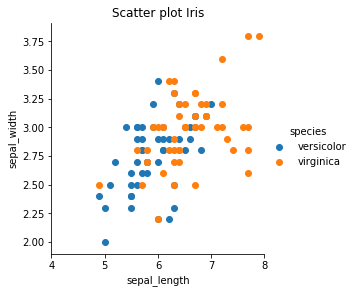

In [61]:

g1=sns.FacetGrid(iris2, hue="species", height=4) .map(plt.scatter,"sepal_length", "sepal_width" ).add_legend()
g1.ax.set_xlim(4, 8)
plt.title('Scatter plot Iris')
#plt.savefig('images/01_lda_lda2.png', dpi=300)

Para armar la clasificación extraemos ls variables  sepal length and sepal width, las  columnas 1 y 2 de los datos y  species la cual es la columna 5


In [62]:


X_data2 = iris2.iloc[:, [1,2]].values
y_data2 = iris2.iloc[:, 5].replace({'versicolor':1,'virginica':2}).copy()
#print(y_data2)

In [63]:
lda = LinearDiscriminantAnalysis(store_covariance=True)
lda.fit(X_data2,y_data2)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=True, tol=0.0001)

Ahora mostramos la región de decisión

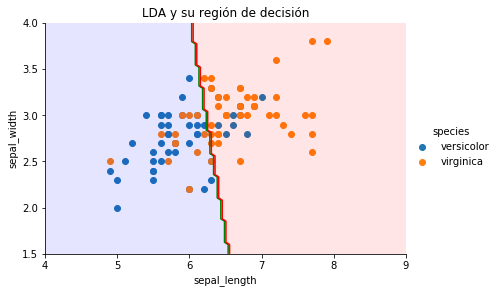

In [64]:


    
# region de decisión 
N = 100
X = np.linspace(4, 9, N)
Y = np.linspace(1.5, 4, N)
X, Y = np.meshgrid(X, Y)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(iris2, hue="species", height=4,aspect=1.5) .map(plt.scatter, "sepal_length", "sepal_width",).add_legend()
my_ax = g.ax


#calcular la funcion de clase predictiva para cada valor de la grilla 
zz = np.array(  [lda.predict( np.array([[xx,yy]])) 
                     for xx, yy in zip(np.ravel(X), np.ravel(Y)) ] )
    
#Rearmar las clases predichas en forma de meshgrid 
Z = zz.reshape(X.shape)


#Graficar los contornos
my_ax.contourf( X, Y, Z, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X, Y, Z, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('sepal_length')
my_ax.set_ylabel('sepal_width')
my_ax.set_title('LDA y su región de decisión')


#plt.savefig('images/02_pca_lda2.png', dpi=300)
plt.show()

Ahora miremos mejor como es la forma del clasificador lineal de dos clases calculando (m1 + m2)/2 el punto a partir del cual las proyecciones se dividen

In [65]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(X_data2,y_data2).transform(X_data2)
m1=np.mean(X_r2[:50])
m2=np.mean(X_r2[50:])
print((m1+m2)/2)
      


2.1094237467877974e-15


Armo un dataframe para visualizar esas proyecciones

In [66]:
l = [i for i in range(0,100)]
df1 = pd.DataFrame(X_r2, columns=["LD1"])
df1['cases']=l
df1['species'] = iris2.iloc[:, 5]

Ahora lo grafico

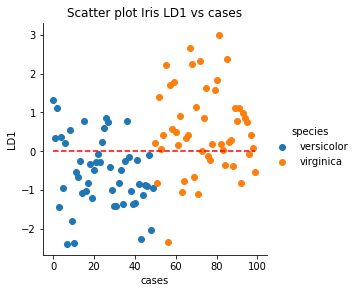

In [67]:
g=sns.FacetGrid(df1, hue="species", height=4) .map(plt.scatter,"cases", "LD1", ).add_legend()
plt.title('Scatter plot Iris LD1 vs cases')
g.ax.set_xlabel('cases')
g.ax.set_ylabel('LD1')
#g.ax.set_xlim(-4, 4)

#####horizontal line
horiz_line_data = np.array([(m1+m2)/2 for i in range(0,100)])
plt.plot(df1.cases, horiz_line_data, 'r--') 

Eso no es muy bueno, en esta proyeccion los datos se amontonan. no puedo hacer mas porque el número de discriminantes depende de las clases, no de las variables. Sin embargo hay cuatro variables y uso solo dos, puedo realizar algo mas. 

Realizo otra proyección con toda la información, buscando las primeras componentes principales. 

Para eso  extraemos todas las variables, las  columnas 1 a 4 de los datos y  species la cual es la columna 5

In [68]:
pca = decomposition.PCA(n_components=2)
# extraigo cuatro variables 
X_data = iris2.iloc[:, 1:5].values
#print(X_data)
pca.fit(X_data)
data = pca.transform(X_data)

vr = pca.explained_variance_ratio_
print(pca.explained_variance_ratio_)

[0.83717573 0.08612781]


Proyecto los datos para verlos sobre las primeras dos componentes principales

In [69]:
df = pd.DataFrame(data, columns=["PC1", "PC2"])
df['species'] = iris2['species']
y_labels = iris.iloc[50:, 4].replace({'versicolor':1,'virginica':2}).copy()

Text(33.04657118055556, 0.5, 'PC2 (0.86%)')

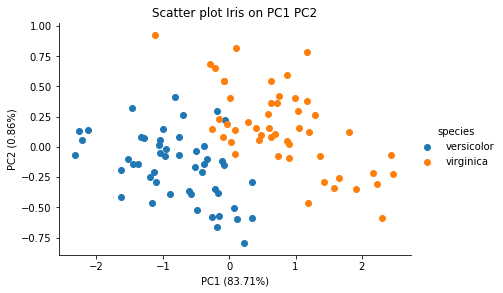

In [70]:

g=sns.FacetGrid(df, hue="species", height=4,aspect=1.5) .map(plt.scatter,"PC1", "PC2", ).add_legend()
plt.title('Scatter plot Iris on PC1 PC2')
g.ax.set_xlabel('PC1 (83.71%)')
g.ax.set_ylabel('PC2 (0.86%)')
#g.ax.set_xlim(-4, 4)
#plt.savefig('images/03_pca_lda2.png', dpi=300)

Ahora voy a clasificar los datos proyectados porque obviamente se separan linealmente!!!!

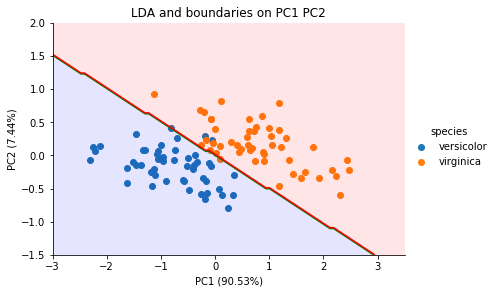

In [71]:


lda = LinearDiscriminantAnalysis(solver="svd", store_covariance=True)
lda.fit(data,y_labels)


# Our 2-dimensional distribution will be over variables X and Y
N = 100
X3 = np.linspace(-3, 3.5, N)
Y3 = np.linspace(-1.5, 2, N)
X3, Y3 = np.meshgrid(X3, Y3)

#fig = plt.figure(figsize = (10,10))
#ax = fig.gca()
color_list = ['Blues','Greens','Reds']
my_norm = colors.Normalize(vmin=-1.,vmax=1.)

g = sns.FacetGrid(df, hue="species", height=4,aspect=1.5 ) .map(plt.scatter, "PC1", "PC2",)  .add_legend()
my_ax = g.ax


#Computing the predicted class function for each value on the grid
zz3 = np.array(  [lda.predict( np.array([[xx3,yy3]])) 
                     for xx3, yy3 in zip(np.ravel(X3), np.ravel(Y3)) ] )
    
#Reshaping the predicted class into the meshgrid shape
Z3 = zz3.reshape(X3.shape)


#Plot the filled and boundary contours
my_ax.contourf( X3, Y3, Z3, 2, alpha = .1, colors = ('blue','green','red'))
my_ax.contour( X3, Y3, Z3, 2, alpha = 1, colors = ('blue','green','red'))

# Addd axis and title
my_ax.set_xlabel('PC1 (90.53%)')
my_ax.set_ylabel('PC2 (7.44%)')
my_ax.set_title('LDA and boundaries on PC1 PC2')


#plt.savefig('images/04_pca_lda2.png', dpi=300)
plt.show()

Rehago el trabajo de ver como proyecto los datos proyectados en la (única ) componente discriminante

In [72]:
lda = LinearDiscriminantAnalysis(n_components=1)
X_r2 = lda.fit(data,y_labels).transform(data)
m1=np.mean(X_r2[:50])
m2=np.mean(X_r2[50:])
print((m1+m2)/2)
      



1.1102230246251565e-16


In [73]:
l = [i for i in range(0,100)]
df1 = pd.DataFrame(X_r2, columns=["LD1"])
df1['cases']=l
df1['species'] = iris2.iloc[:, 5]

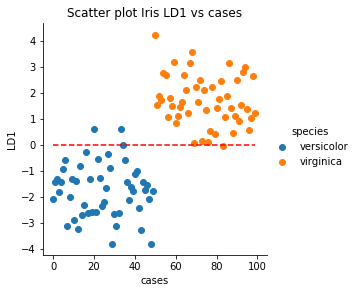

In [74]:
g=sns.FacetGrid(df1, hue="species", height=4) .map(plt.scatter,"cases", "LD1", ).add_legend()
plt.title('Scatter plot Iris LD1 vs cases')
g.ax.set_xlabel('cases')
g.ax.set_ylabel('LD1')
#g.ax.set_xlim(-4, 4)

#####horizontal line
horiz_line_data = np.array([(m1+m2)/2 for i in range(0,100)])
plt.plot(df1.cases, horiz_line_data, 'r--') 

Aquí se ve que el cero separa las clases bastante bien. 
